# correlation (excercise one)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt #Useful to include matplotlib when plotting with Seaborn, because Seaborn is built on it.

In [2]:
df = pd.read_csv('funda-amsterdam.txt')
df.head()

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


In [4]:
df_subset = df[["price", "area", "rooms"]]

In [5]:
df_subset.head()

,price,area,rooms
0,510000,108,3
1,215000,47,2
2,325000,116,3
3,315000,58,3
4,200000,63,3


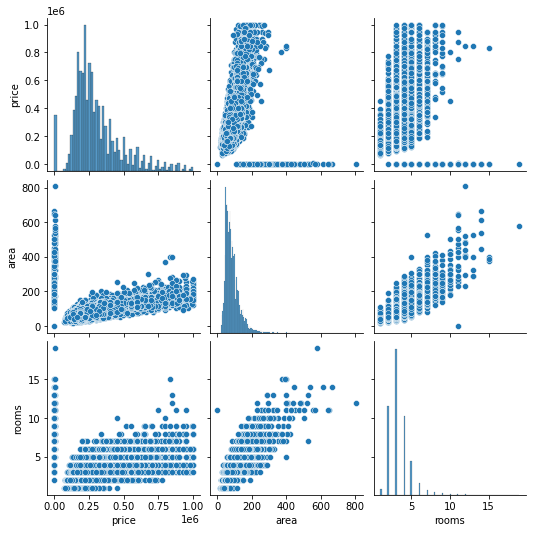

In [6]:
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot

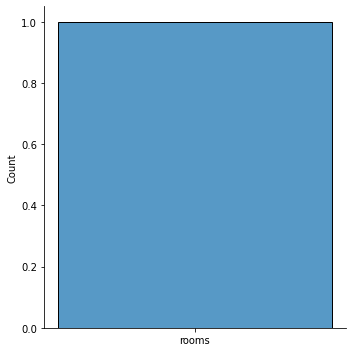

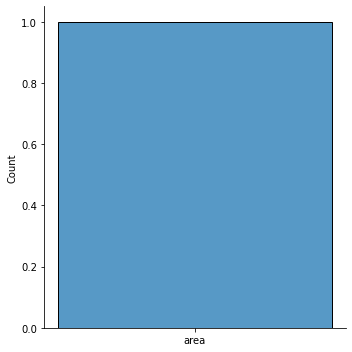

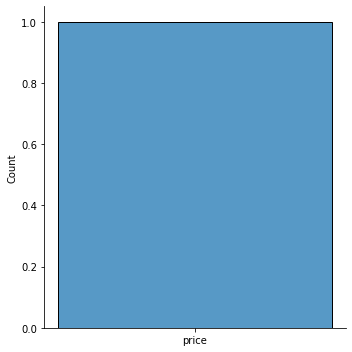

In [15]:
sns.displot('rooms')
plt.show()
sns.displot('area')
plt.show()
sns.displot('price')
plt.show()


In [7]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(df['rooms'],df['area']))
print(pearsonr(df['area'],df['price']))

(0.8173508686761167, 0.0)
(0.31248795026382037, 1.2701622617660068e-257)


##### We can conclude the following:

##### Rooms and Area are strongly correlated (r = 0.817)
##### The correlation is highly significant (p < 0.001)

##### Area and price are not very strong correlated (r = 0.312)
##### The correlation is not significant (p > 1)
##### We can also calculate all the correlations and make a correlation matrix by using the Pandas corr() method for dataframes.

In [11]:
corr = df[['rooms', 'area', 'price']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,rooms,area,price
rooms,1.000000,0.817351,0.283424
area,0.817351,1.000000,0.312488
price,0.283424,0.312488,1.000000


##### in this table you can see all of the correlations between the variables. 

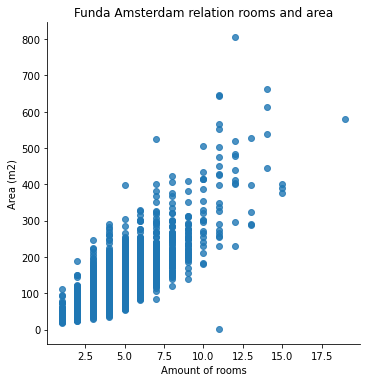

In [13]:
sns.lmplot(x='rooms', y='area', fit_reg=False, data=df_subset) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Amount of rooms') #use matplotlib to refine Seaborn plot
plt.ylabel('Area (m2)')
plt.title('Funda Amsterdam relation rooms and area')
plt.show()

###### We can see in this figure that there is a positive relationship between the amount of rooms and the area of the house. 

In [14]:
print(pearsonr(df['rooms'],df['area']))

(0.8173508686761167, 0.0)


# linear regression (excercise two)

In [16]:
import seaborn as sns
import sklearn as sk #this is the most popular library for statistics and machine learning
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
df = pd.read_csv('funda-amsterdam.txt')
df.head(10)

,id,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,515000,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,200000,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,599000,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,249000,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,300000,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900


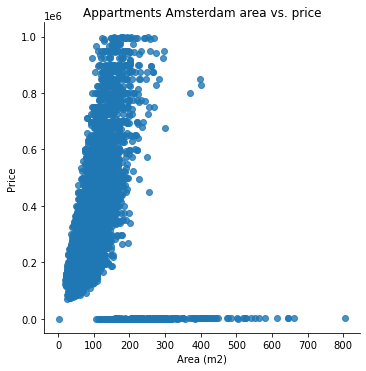

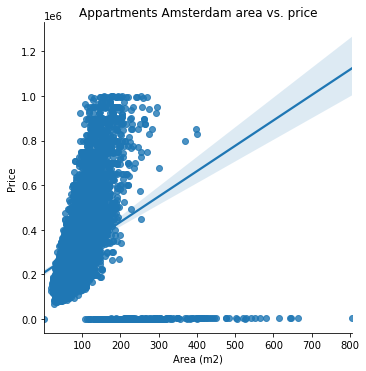

In [18]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line
plt.xlabel('Area (m2)')
plt.ylabel('Price')
plt.title('Appartments Amsterdam area vs. price')
plt.show()
sns.lmplot(x='area', y='price', fit_reg=True, data=df) #fit_reg=True creates the regression line
plt.xlabel('Area (m2)')
plt.ylabel('Price')
plt.title('Appartments Amsterdam area vs. price')
plt.show()

###### we can see that there are a lot of useless variables, in the code below we errase these rows

In [19]:
df = df[(df['price'] > 30000) & (df['area'] > 10) & (df['rooms'] > 0)] # remove useless rows

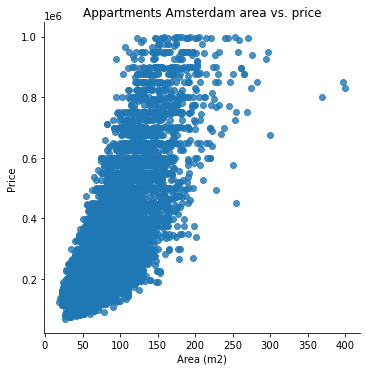

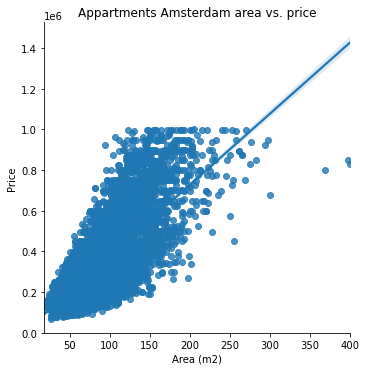

In [20]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df) #fit_reg=False leaves out the regression line
plt.xlabel('Area (m2)')
plt.ylabel('Price')
plt.title('Appartments Amsterdam area vs. price')
plt.show()
sns.lmplot(x='area', y='price', fit_reg=True, data=df) #fit_reg=True creates the regression line
plt.xlabel('Area (m2)')
plt.ylabel('Price')
plt.title('Appartments Amsterdam area vs. price')
plt.show()

In [21]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = df[['area']] 
y = df['price']
lm = LinearRegression() #this creates a new LR model
lm.fit(x, y) #this "fits" the model

b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X") #.0f formats to 3 decimals. 

The regression line is equal to y = 27983.930 + 3498.814X
